## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>LAB 12. THUẬT TOÁN TÌM ĐƯỜNG (2)</center>

In [2]:
# run this cell FIRST
%run test_cases_12.ipynb

## Bài 1. Kích Thước Tầng

Kích thước của một tầng trong cây nhị phân được định nghĩa là số node trên tầng đó.

**Yêu cầu**: Cho một cây nhị phân có không quá 1000 node và một số nguyên *k*. Hãy tìm kích thước của tầng thứ *k*, biết các tầng được đánh số từ 0, bắt đầu từ node gốc.

**Input**: Một cây nhị phân chứa số nguyên và một số nguyên *-10<sup>6</sup> < k < 10<sup>6</sup>*.  
**Output**: Một số nguyên là kích thước của tầng *k*. Trả về 0 nếu cây không chứa tầng thứ *k*.  
**Ví dụ**:  

- Input: <code>root</code>, 2
- Output: 3
- Giải thích: Ở tầng thứ hai có 3 node là [1, 6, 14]

![](./assets/binary-search-tree.png)

In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

root = Node(8)
root.left, root.right = Node(3), Node(10)
root.left.left, root.left.right = Node(1), Node(6)
root.left.right.left, root.left.right.right = Node(4), Node(7)
root.right.right = Node(14)
root.right.right.left = Node(13)

In [5]:
def find_level_size(root, level):
    pass

In [10]:
# !!! DO NOT MODIFY THIS CELL
# Check result on test cases
test1(find_level_size)

Testing on 11 cases.
- Test 1 PASSED.
- Test 2 PASSED.
- Test 3 PASSED.
- Test 4 PASSED.
- Test 5 PASSED.
- Test 6 PASSED.
- Test 7 PASSED.
- Test 8 PASSED.
- Test 9 PASSED.
- Test 10 PASSED.
- Test 11 PASSED.
CONGRATULATIONS! All test cases passed!


## Bài 2. Thoát Khỏi Mê Cung

Ở bài trước, ta đã dùng DFS để tạo mê cung. Tuy nhiên, thuật toán DFS không đảm bảo ta tìm được đường ngắn nhất để thoát khỏi mê cung.  

Do đó, ta sẽ dùng thuật toán BFS để tìm đường ngắn nhất:
- Bắt đầu duyệt mê cung từ ô trên cùng bên trái.
- Ở mỗi bước duyệt, kiểm tra xem có thể đi từ ô hiện tại sang các ô cùng cạnh hay không bằng cách kiểm tra các mảng <code>vertical</code> và <code>horizontal</code>. Khi sang một ô mới, lưu ô liền trước nó để truy vấn lại đường đi.
- Kết thúc duyệt khi tìm thấy ô dưới cùng bên phải. Do mê cung ta tạo đảm bảo luôn có lối thoát nên không cần xử lý trường hợp không tìm thấy đường ra.
   
**Ví dụ** về đường đi ngắn nhất để thoát khỏi mê cung:
![](./assets/solve_maze.png)

Hàm <code>plot_maze_with_path()</code> để vẽ mê cung từ <code>vertical</code>, <code>horizontal</code> và vẽ đường đi từ <code>path</code> đã được viết sẵn.

In [11]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_maze_with_path(vertical, horizontal, path=None, before=None, fig_height=8):

    # init height & width
    height = len(vertical)
    width = len(vertical[0])
    
    # init figure
    fig = plt.figure(figsize=(fig_height*2, fig_height))
    fig.patch.set_visible(False)

    # draw maze borders
    for row in range(height):
        for col in range(width):
            if vertical[row][col]:
                plt.plot((col, col), (row, row+1), color='white')
            if horizontal[row][col]:
                plt.plot((col, col+1), (row, row), color='white')

    # draw surrounding borders on the right & bottom
    plt.plot((width, width), (0, height-1), color='white')
    plt.plot((0, width), (height, height), color='white')

    # styling the plot
    ax = plt.gca()
    ax.set_facecolor((0, 0, 0))
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.xticks([])
    plt.yticks([])
    
    # add arrows
    plt.arrow(0, 0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    plt.arrow(width-0.8, height-0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    
    # plot path
    if path != None:
        last_step = (0, -0.5)
        for step in path + [(height-1, width-0.5)]:
            plt.plot((last_step[1]+0.5, step[1]+0.5), (last_step[0]+0.5, step[0]+0.5), color='cyan', linestyle='-.')
            last_step = step
            
    # plot every paths
    if before != None:
        for row in range(height):
            for col in range(width):
                if before[row][col] != None:
                    last_step = before[row][col]
                    plt.plot((last_step[1]+0.5, col+0.5), (last_step[0]+0.5, row+0.5), color='yellow', linestyle='-.')
    
    plt.show()

Các mảng <code>vertical</code> và <code>horizontal</code> được định nghĩa như bài trước.  

Ta cần tìm mảng <code>path</code> chứa đường đi ngắn nhất để thoát khỏi mê cung. Mỗi phần tử trong mảng là một tuple chứa tọa độ của một ô trên đường đi, được lưu theo dạng (<code>row</code>, <code>column</code>).

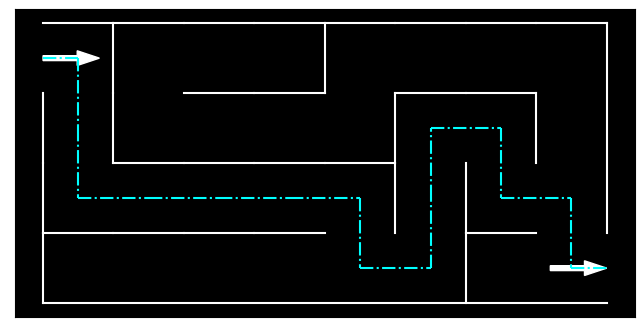

In [12]:
vertical = [
    [False, True, False, False, True, False, False, False],
    [True, True, False, False, False, True, False, True],
    [True, False, False, False, False, True, True, False],
    [True, False, False, False, False, False, True, False]]
horizontal = [
    [True, True, True, True, True, True, True, True],
    [False, False, True, True, False, True, True, False],
    [False, True, True, True, True, False, False, False],
    [True, True, True, True, False, False, True, False]]

path = [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (3, 5), (2, 5), (1, 5), (1, 6), (2, 6), (2, 7), (3, 7)]

plot_maze_with_path(vertical, horizontal, path=path, fig_height=4)

**Yêu cầu**: Hãy hiện thực hàm <code>find_path()</code> nhận vào <code>vertical</code>, <code>horizontal</code> và trả về đường đi <code>path</code> theo định dạng như trên.

In [8]:
def find_path(vertical, horizontal):
    
    # YOUR CODE HERE
    
    return path

Kết quả mong đợi như bên dưới:

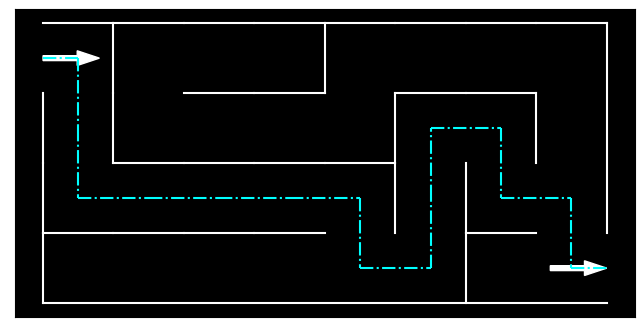

In [62]:
path = find_path(vertical, horizontal)
plot_maze_with_path(vertical, horizontal, path=path, fig_height=4)

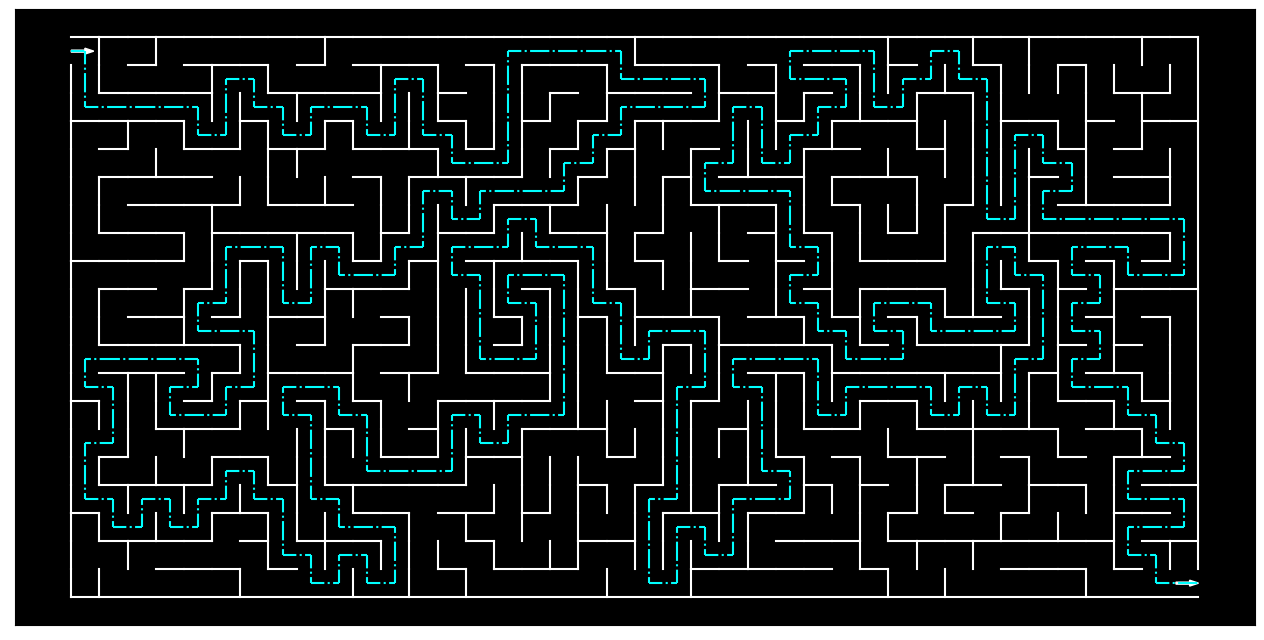

In [63]:
vertical = [[False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, True, False], [True, True, False, False, False, True, False, True, False, False, False, True, False, True, False, True, True, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, False, True, True, True, True, True, False, True], [True, False, False, False, False, True, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False, False, False, True, False, True, True, False, True, False, True, False, True, True, False, False, True, False, True, False], [True, False, True, False, True, False, True, True, False, True, True, False, True, False, True, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, True, True, False, True, True, False, True, False], [True, False, False, True, False, False, False, True, True, False, False, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, True, False, False, True, False, True, True, True, True, False, True, False, False, True], [True, True, False, False, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, False, True, False, False, True], [True, True, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, True, False, True, True, True, True, False, False, True, False, False, False, False, False], [True, False, False, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, False, False, True], [True, False, False, False, False, True, True, True, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, True, True, False, True, False, True, False, False], [True, True, False, False, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, False, True, False, True, False, False, True, False, True, True, False, False, True, True, False, True, True, False, True, False, False], [True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, False, False, True, False, True, False, True, False, False, False, True, True, False, True, False, True], [True, False, False, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, True, True, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, True], [True, False, True, True, False, True, False, True, False, False, True, False, True, False, False, False, False, True, True, False, False, True, False, True, False, True, True, True, False, False, False, True, False, True, True, True, False, False, True, True], [True, True, True, True, False, False, True, True, False, True, False, True, False, True, False, True, False, False, True, True, False, True, True, False, True, True, True, False, True, False, True, False, True, False, True, False, False, True, False, True], [True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, False, False, True, False, False, True, False, False, True, False], [True, True, False, True, False, True, False, True, True, True, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, False, True, False, False], [True, False, True, False, True, False, True, False, True, False, True, False, False, False, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, False, True, False, True, True, False, False], [True, True, False, True, False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, False, True, True, False, True, True, False, False, False, True, True, False, False, False, True, False, True, False, True, False, False], [True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, True, False, True, True, False, True, True, True, False, True, False, False, False, True, False, True, False, True, False, False, False, False, True, False, True], [True, True, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False]]
horizontal = [[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [False, False, True, False, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, False, True, False, False, False, False], [False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, True, True, False], [True, True, True, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, True, True, True, False, False, True, False, True, True, True, False, False, False, True, True, False, True, False, True, True], [False, True, False, False, True, True, False, True, True, False, True, True, True, False, True, False, False, True, False, True, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False], [False, True, True, True, True, False, False, False, False, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False, True, True, False], [False, False, True, True, True, True, False, True, True, True, False, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, False, True, True, True, True, False], [False, True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, False, True, False, True, False, False, True, False, False, True, True, True, True, True, True, True, False], [True, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, False, False, True, False, True, False, True, False], [False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, False, True, True, False, False, True, False, True, True, True, False, False, True, False, True, False, True, True, True], [False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, False, True, True, False, True, False, True, False, True, True, False, False, False, True, False, True, False], [False, True, True, True, True, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, False, False], [False, True, True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, False], [True, False, False, False, True, False, True, False, True, False, True, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, True, False], [False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, True, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, False], [False, True, False, False, False, True, True, False, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, True, False, True, False, True, True, False], [False, True, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, True, True, False, True, True, False, False, True, True], [True, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, False, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, False, False, True, True, False], [False, True, True, True, True, False, True, False, True, True, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True], [False, False, False, True, True, True, False, True, False, False, False, False, False, True, False, True, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False]]
path = find_path(vertical, horizontal)
plot_maze_with_path(vertical, horizontal, path=path)